In [11]:
#  import these dependencies
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm
import cv2


# Max Pooling Behind The Scenes

In [12]:
def max_pool(image_path, kernel_size=2, visualize=False, title=''):
    """
      This function replicates the maxpooling
      process
      """

    #  assessing image parameter
    if type(image_path) is np.ndarray and len(image_path.shape) == 2:
        image = image_path
    else:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#  creating an empty list to store convolutions
    pooled = np.zeros((image.shape[0]//kernel_size,
    image.shape[1]//kernel_size))

#  instantiating counter
    k = -1
#  maxpooling
    for i in tqdm(range(0, image.shape[0], kernel_size)):
        k += 1
        l = -1
        if k == pooled.shape[0]:
            break
        for j in range(0, image.shape[1], kernel_size):
            l += 1
            if l == pooled.shape[1]:
                break
            try:
                pooled[k, l] = (image[i:(i+kernel_size),
                j:(j+kernel_size)]).max()
            except ValueError:
                pass

    if visualize:
    #  displaying results
        figure, axes = plt.subplots(1, 2, dpi=120)
        plt.suptitle(title)
        axes[0].imshow(image, cmap='gray')
        axes[0].set_title('reference image')
        axes[1].imshow(pooled, cmap='gray')
        axes[1].set_title('maxpooled')
    return pooled


100%|██████████| 143/143 [00:00<00:00, 1953.55it/s]


array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

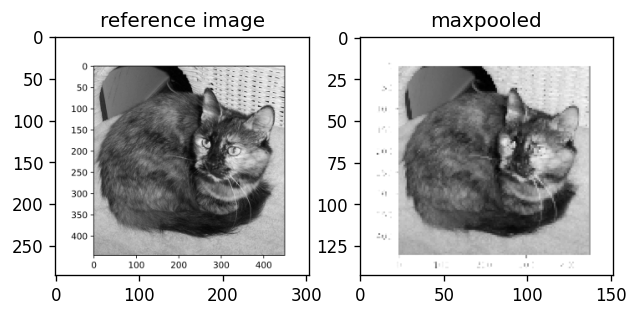

In [13]:
max_pool('image.jpg', 2, visualize=True)


# Visualize max pooling function

In [14]:
def visualize_pooling(image_path, iterations, kernel=2):
    """
      This function helps to visualise several
      iterations of the pooling process
      """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    #  creating empty list to hold pools
    pools = []
    pools.append(image)

    #  performing pooling
    for iteration in range(iterations):
        pool = max_pool(pools[-1], kernel)
        pools.append(pool)
        #  visualisation
    fig, axis = plt.subplots(1, len(pools), dpi=700)
    for i in range(len(pools)):
        axis[i].imshow(pools[i], cmap='gray')
        axis[i].set_title(f'{pools[i].shape}', fontsize=5)
        axis[i].axis('off')
    pass


 97%|█████████▋| 35/36 [00:00<00:00, 5320.21it/s]


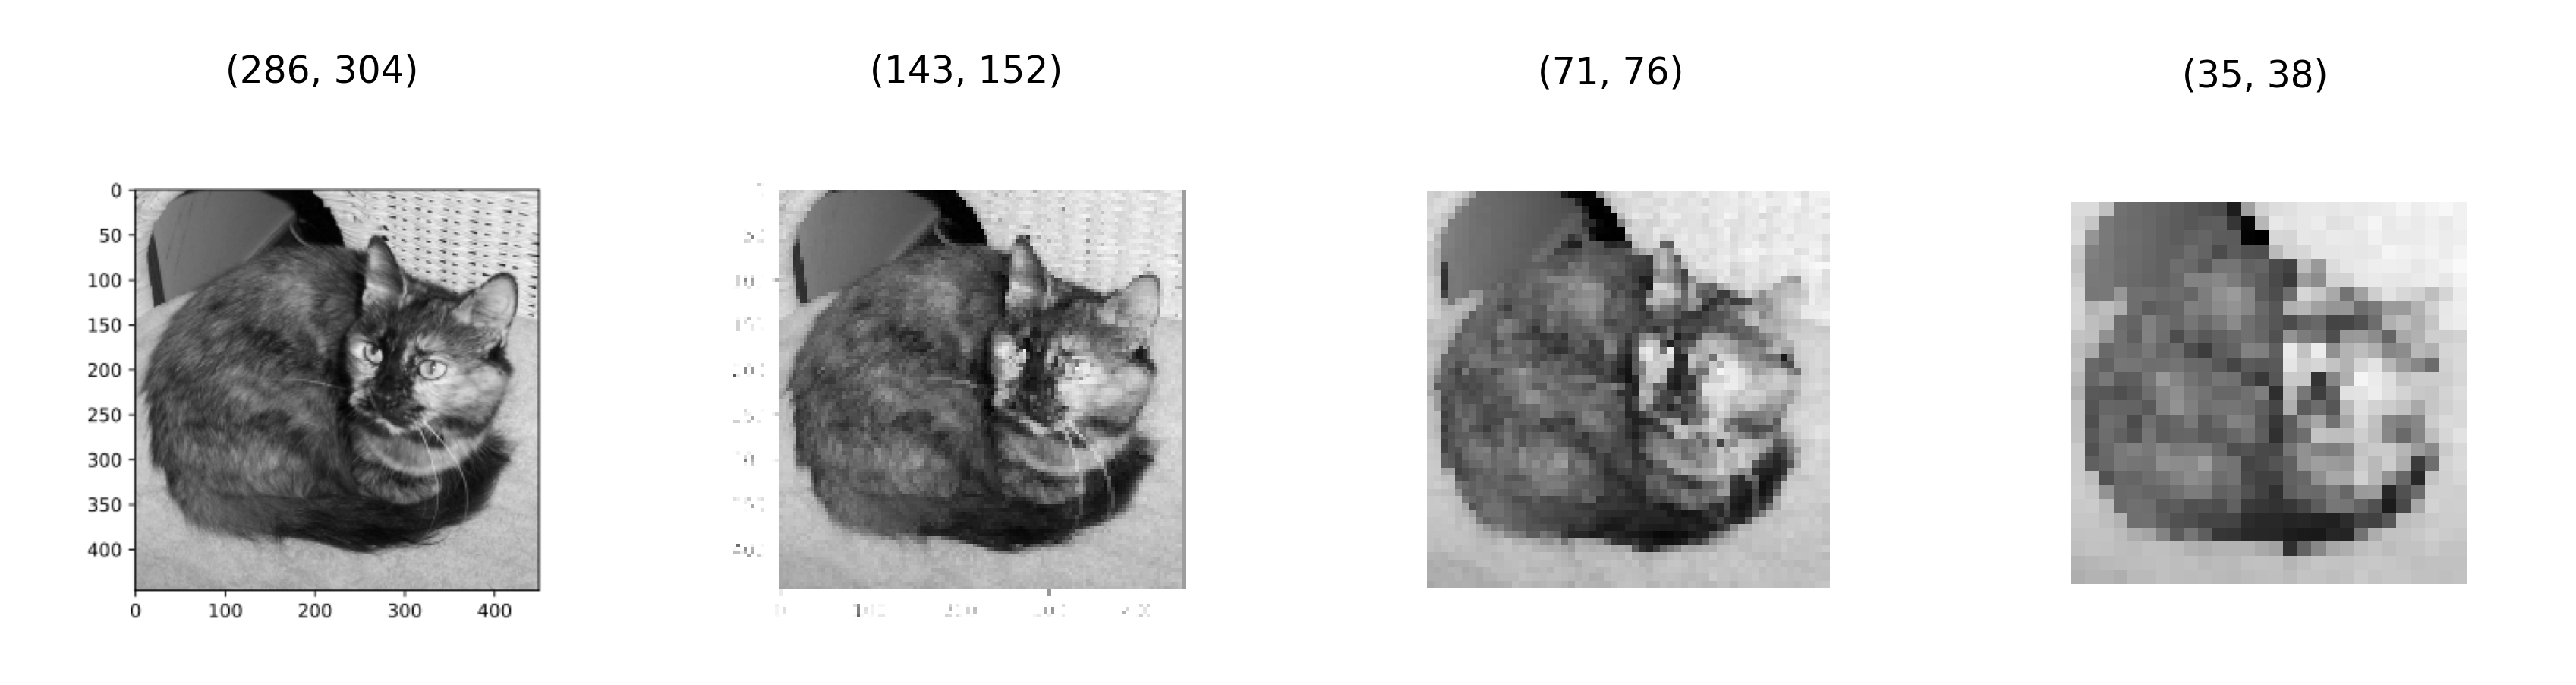

In [15]:
visualize_pooling('image.jpg', 3)


 91%|█████████ | 10/11 [00:00<00:00, 6960.35it/s]


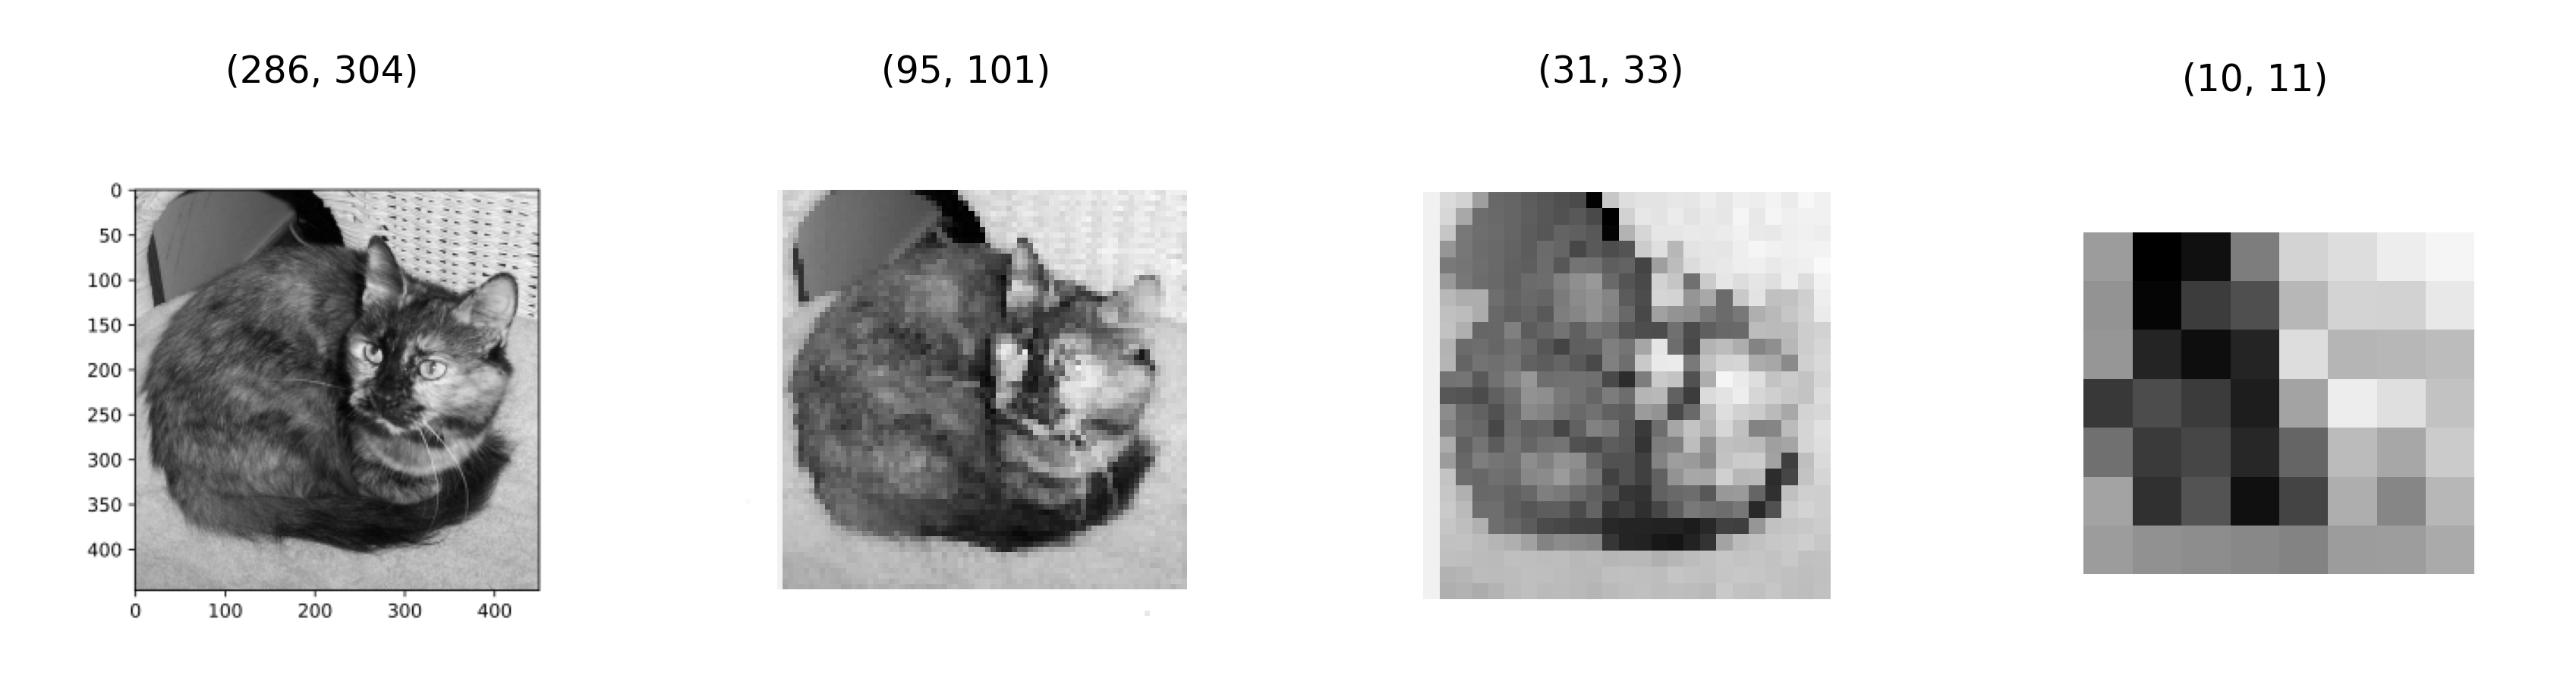

In [16]:
visualize_pooling('image.jpg', 3, kernel=3)


# Average Pooling Behind The Scenes

In [17]:
def average_pool(image_path, kernel_size=2, visualize=False, title=''):
      """
      This function replicates the averagepooling
      process
      """
      
      #  assessing image parameter
      if type(image_path) is np.ndarray and len(image_path.shape)==2:
        image = image_path
      else:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      
      #  creating an empty list to store convolutions
      pooled = np.zeros((image.shape[0]//kernel_size, 
                        image.shape[1]//kernel_size))
                        
      #  instantiating counter
      k=-1
      #  averagepooling
      for i in tqdm(range(0, image.shape[0], kernel_size)):
        k+=1
        l=-1
        if k==pooled.shape[0]:
          break
        for j in range(0, image.shape[1], kernel_size):
          l+=1
          if l==pooled.shape[1]:
            break
          try:
            pooled[k,l] = (image[i:(i+kernel_size), 
                                j:(j+kernel_size)]).mean()
          except ValueError:
            pass
            
      if visualize:
        #  displaying results
        figure, axes = plt.subplots(1,2, dpi=120)
        plt.suptitle(title)
        axes[0].imshow(image, cmap='gray')
        axes[0].set_title('reference image')
        axes[1].imshow(pooled, cmap='gray')
        axes[1].set_title('averagepooled')
      return pooled

100%|██████████| 143/143 [00:00<00:00, 29686.47it/s]


array([[  0.,   0.,   0., ...,   0.,   0., 255.],
       [  0.,   0.,   0., ...,   0.,   0., 255.],
       [  0.,   0.,   0., ...,   0.,   0., 255.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0., 255.],
       [  0.,   0.,   0., ...,   0.,   0., 255.],
       [  0.,   0.,   0., ...,   0.,   0., 255.]])

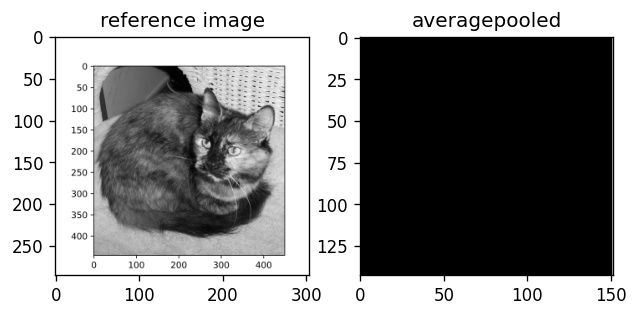

In [18]:
average_pool('image.jpg', 2, visualize=True)


# Visualize average pooling function

In [ ]:
def visualize_pooling(image_path, iterations, kernel=2):
    """
      This function helps to visualise several
      iterations of the pooling process
      """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    #  creating empty list to hold pools
    pools = []
    pools.append(image)

     #  performing pooling
     for iteration in range(iterations):
        pool = average_pool(pools[-1], kernel)
        pools.append(pool)

      #  visualisation
      fig, axis = plt.subplots(1, len(pools), dpi=700)
      for i in range(len(pools)):
        axis[i].imshow(pools[i], cmap='gray')
        axis[i].set_title(f'{pools[i].shape}', fontsize=5)
        axis[i].axis('off')
      pass


In [ ]:
visualize_pooling('image.jpg', 3)


In [ ]:
visualize_pooling('image.jpg', 3, kernel=3)
